In [159]:
from utils import mnist_reader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import (
    auc,
    accuracy_score,
    confusion_matrix as sk_confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    r2_score,
    make_scorer,
)
import torch 

In [160]:
def load_data(pct):
    X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
    X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

    X_train = X_train[:int(len(X_train)*pct)]
    y_train = y_train[:int(len(y_train)*pct)]
    X_test = X_test[:int(len(X_test)*pct)]
    y_test = y_test[:int(len(y_test)*pct)]

    return X_train, y_train, X_test, y_test


In [161]:
def load_data_wrapper(pct=1):
    X_train, y_train, X_test, y_test = load_data(pct)

    # Reshape the data to 28x28x1
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1,28, 28, 1)

    # Normalize the data
    X_train = X_train/255.0
    X_test = X_test/255.0

    # Convert labels to one-hot vectors
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]
    
    return X_train, y_train, X_test, y_test

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


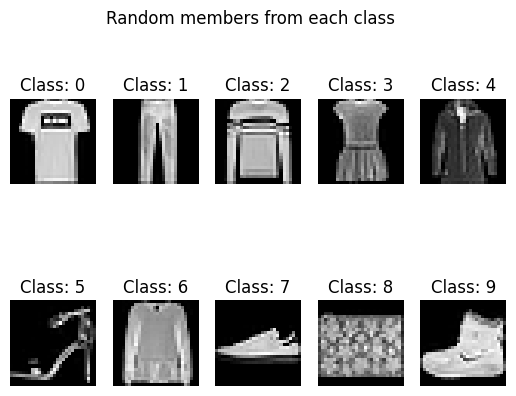

In [162]:
# First, load the Fashion-MNIST dataset from the Fashion-MNIST GitHub repository.
# Use the provided utils.mnist_reader class to load the training data, which should
# contain 60000 training samples. Then, normalize the training sample values to the
# range [0, 1] and visualize one random member from each of the 10 classes.

# visualize one random member from each of the 10 classes.
# | Label | Description |
# | --- | --- |
# | 0 | T-shirt/top |
# | 1 | Trouser |
# | 2 | Pullover |
# | 3 | Dress |
# | 4 | Coat |
# | 5 | Sandal |
# | 6 | Shirt |
# | 7 | Sneaker |
# | 8 | Bag |
# | 9 | Ankle boot |


X_train, y_train, X_test, y_test = load_data_wrapper(pct=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Select one random member from each class
random_members = []
for i in range(10):
    random_members.append(np.where(y_train[:,i]==1)[0][0])

# Plot the random members
fig, ax = plt.subplots(2,5)
fig.suptitle("Random members from each class")
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[random_members[5*i+j]].reshape(28,28), cmap='gray')
        ax[i,j].set_title(f"Class: {5*i+j}")
        ax[i,j].axis('off')

In [163]:
# Split the data into two subsets: a training subset and a validation subset, where the
# latter constitutes of 20 percent random samples from the entire data set. Reshape the
# sample data in both subsets such that each sample corresponds to a two-dimensional
# image with a single channel. The dimensions of each subset should be equal to
# [N, 1, 28, 28], where N denotes the total number of samples in the subset. Convert
# both the samples and the labels of both subsets to PyTorch Tensors, where you
# additionally transform the class labels to one-hot encodings. 

split = 0.8
# Split the data 
X_train, X_val = np.split(X_train, [int(split * len(X_train))])
y_train, y_val = np.split(y_train, [int(split * len(y_train))])

# Reshape the data to 28x28x1
X_train = X_train.reshape(-1, 1, 28, 28)
X_val = X_val.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1,1, 28, 28)

# Convert both the samples and the labels of both subsets to PyTorch Tensors, where you additionally transform the class labels to one-hot encodings
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_val_tensor.shape)
print(y_val_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)

torch.Size([48000, 1, 28, 28])
torch.Size([48000, 10])
torch.Size([12000, 1, 28, 28])
torch.Size([12000, 10])
torch.Size([10000, 1, 28, 28])
torch.Size([10000, 10])


In [164]:
# Define the following Python class and fill out its class methods:

# c l a s s Dataset ( ) :
# def _ _ i n i t _ _ ( s e l f , samples , l a b e l s , b a t c h _ s i z e ) :
#     # TODO: P r o vi d e i m pl e m e n t a ti o n
#     pass
# def __getitem__ ( s e l f , index ) :
#     # TODO: P r o vi d e i m pl e m e n t a ti o n
#     pass
# def __len__ ( s e l f ) :
#     # TODO: P r o vi d e i m pl e m e n t a ti o n
#     pass
# def s h u f f l e ( s e l f ) :
#     # TODO: P r o vi d e i m pl e m e n t a ti o n
#     pass

# The Dataset class will serve batched, randomly shuffled samples during training and
# validation. Therefore, the samples and labels should contain the matrix of data sam-
# ples and their corresponding labels. The batch_size denotes the number of samples
# each call of the __getitem__ method should provide. Finally, __getitem__ should
# return the data batch corresponding to the counter index, __len__ the length of the
# dataset in terms of batches, and the shuffle method should randomly permute the
# samples in the dataset.

# The __getitem__ function should be deterministic: each method call with the
# same index on the same dataset permutation should always return the same
# batch!
# Pay attention to the case where the batch_size does not evenly divide the number
# of samples!

class Dataset():
    def __init__(self, samples, labels, batch_size):
        self.samples = samples
        self.labels = labels
        self.batch_size = batch_size
        self.length = int(np.ceil(len(samples)/batch_size))

    def __getitem__(self, index):
        return self.samples[index*self.batch_size:(index+1)*self.batch_size], self.labels[index*self.batch_size:(index+1)*self.batch_size]
    
    def __len__(self):
        return self.length
    
    def shuffle(self):
        idx = np.arange(len(self.samples))
        np.random.shuffle(idx)
        self.samples = self.samples[idx]
        self.labels = self.labels[idx]

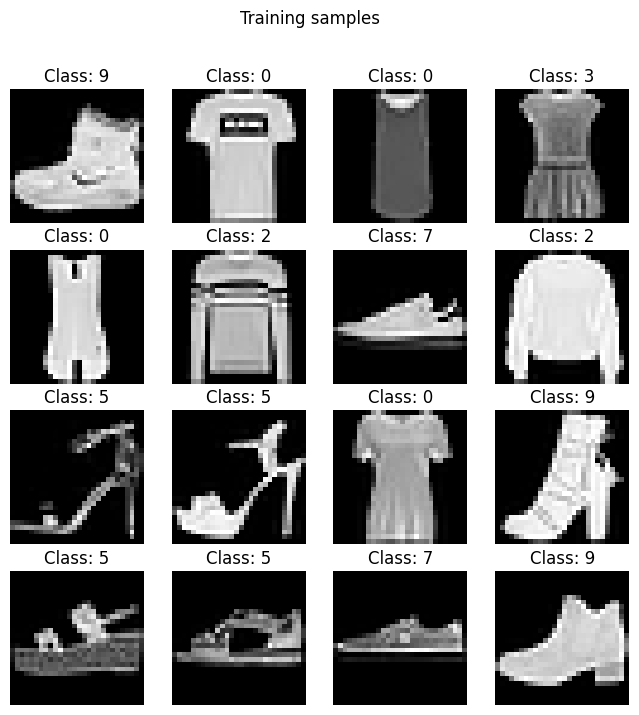

In [94]:
# Use the Dataset class to create two datasets: a training dataset using the previous
# training data subset, and a validation dataset using the validation data subset. Visu-
# alize 16 samples from a batch belonging to the training dataset and their correspond-
# ing class labels.

# Create the datasets
batch_size = 16
train_dataset = Dataset(X_train_tensor, y_train_tensor, batch_size)
val_dataset = Dataset(X_val_tensor, y_val_tensor, batch_size)

# Visualize 16 samples from a batch belonging to the training dataset and their corresponding class labels
samples, labels = train_dataset[0]

fig, ax = plt.subplots(4,4)
fig.set_size_inches(8,8)
fig.suptitle("Training samples")
for i in range(4):
    for j in range(4):
        ax[i,j].imshow(samples[4*i+j].reshape(28,28), cmap='gray')
        ax[i,j].set_title(f"Class: {np.argmax(labels[4*i+j])}")
        ax[i,j].axis('off')

In [110]:
# Now, we will implement three basic operations that will serve as the backbone of our
# classification neural network. These operations are: two-dimensional convolution,
# two-dimensional max pooling, and the element-wise Linear Rectified Unit.

# c l a s s Conv2d ( t o r c h . nn . Module ) :
# def _ _ i n i t _ _ ( s e l f , i n _ c h a n n e l s , out_channels ,
# k e r n e l _ s i z e , s t r i d e ) :
# super ( ) . _ _ i n i t _ _ ( )
# # TODO: P r o v i d e i m p l e m e n t a t i o n
# s e l f . weight = None
# s e l f . b i a s = None
# pass
# def forward ( s e l f , x ) :
# # TODO: P r o v i d e i m p l e m e n t a t i o n
# pass
# c l a s s MaxPool2d ( t o r c h . nn . Module ) :
# def _ _ i n i t _ _ ( s e l f , k e r n e l _ s i z e , s t r i d e ) :
# super ( ) . _ _ i n i t _ _ ( )
# # TODO: P r o v i d e i m p l e m e n t a t i o n
# pass
# def forward ( s e l f , x ) :
# # TODO: P r o v i d e i m p l e m e n t a t i o n
# pass
# c l a s s ReLU ( t o r c h . nn . Module ) :
# def _ _ i n i t _ _ ( s e l f ) :
# super ( ) . _ _ i n i t _ _ ( )
# # TODO: P r o v i d e i m p l e m e n t a t i o n
# pass
# def forward ( s e l f , x ) :
# # TODO: P r o v i d e i m p l e m e n t a t i o n
# pass

# The Conv2d class should implement a two-dimensional convolution operation with
# the following parameters: in_channels denotes the number of input channels, out_
# channels the number of output channels, kernel_size the size of the convolution
# kernel, and stride the stride of the convolution kernel. The kernel_size and stride
# parameters should be tuples of two integers, where the first integer denotes the
# height and the second integer denotes the width of the kernel. The forward method
# should implement the convolution operation on the input tensor x and return the
# result. The weight and bias parameters should be initialized randomly using the
# normal distribution with a standard deviation of 0.01.

# The MaxPool2d class should implement a two-dimensional max pooling operation
# with the following parameters: kernel_size denotes the size of the max pooling
# kernel, and stride the stride of the max pooling kernel. The kernel_size and stride
# parameters should be tuples of two integers, where the first integer denotes the
# height and the second integer denotes the width of the kernel. The forward method
# should implement the max pooling operation on the input tensor x and return the
# result.

# The ReLU class should implement the element-wise Linear Rectified Unit operation
# on the input tensor x. The forward method should implement the Linear Rectified
# Unit operation on the input tensor x and return the result.


# class Conv2d(torch.nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size, stride):
#         super().__init__()
#         # Initialize weights and bias as learnable parameters
#         self.weight = torch.nn.Parameter(torch.randn(out_channels, in_channels, kernel_size[0], kernel_size[1]) * 0.01)
#         self.bias = torch.nn.Parameter(torch.randn(out_channels) * 0.01)
#         self.stride = stride
#         self.kernel_size = kernel_size
#         self.in_channels = in_channels
#         self.out_channels = out_channels
        
#     def forward(self, x):
#         # Get the dimensions of the input tensor
#         N, C, H, W = x.shape
#         # Calculate the number of output channels, kernel height, and kernel width from the weight tensor
#         out_channels, _, kernel_height, kernel_width = self.weight.shape

#         # Calculate the output spatial dimensions (height and width)
#         out_height = (H - kernel_height) // self.stride[0] + 1
#         out_width = (W - kernel_width) // self.stride[1] + 1

#         # Initialize the output tensor with zeros
#         out = torch.zeros(N, out_channels, out_height, out_width)

#         # Iterate over the output spatial dimensions
#         for i in range(out_height):
#             for j in range(out_width):
#                 # Calculate the start and end indices for the height and width of the input region
#                 h_start = i * self.stride[0]
#                 h_end = h_start + kernel_height
#                 w_start = j * self.stride[1]
#                 w_end = w_start + kernel_width

#                 # Extract the region of interest from the input tensor
#                 reg = x[:, :, h_start:h_end, w_start:w_end]

#                 # Iterate over each output channel
#                 for k in range(out_channels):
#                     # Perform element-wise multiplication between the extracted region and the corresponding weight
#                     # Sum over the channel and spatial dimensions and add the bias for the current output channel
#                     out[:, k, i, j] = torch.sum(reg * self.weight[k, :, :, :], dim=(1, 2, 3)) + self.bias[k]

#         return out


# class MaxPool2d(torch.nn.Module):
#     def __init__(self, kernel_size, stride):
#         super().__init__()
#         self.kernel_size = kernel_size
#         self.stride = stride
    
#     def forward(self, x):
#         # Get the dimensions of the input
#         N, C, H, W = x.shape

#         # Get the dimensions of the output
#         out_height = int((H-self.kernel_size[0])/self.stride[0]+1)
#         out_width = int((W-self.kernel_size[1])/self.stride[1]+1)

#         # Initialize the output
#         out = torch.zeros(N, C, out_height, out_width)
        
#         # Perform the max pooling
#         for i in range(out_height):
#             for j in range(out_width):

#                 # Select the corresponding region in the input
#                 reg = x[:, :, i*self.stride[0] : i*self.stride[0] + self.kernel_size[0], j*self.stride[1] : j*self.stride[1] + self.kernel_size[1]]

#                 # Reshape the region to merge the last two dimensions
#                 reg = region.reshape(N, C, -1)

#                 # Find the maximum value over the last dimension
#                 max_values, _ = torch.max(reg, dim=2)
#                 out[:, :, i, j] = max_values
                
#         return out


class Conv2d(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.randn(out_channels, in_channels, *kernel_size) * 0.01)
        self.bias = torch.nn.Parameter(torch.randn(out_channels) * 0.01)
        self.stride = stride
        self.kernel_size = kernel_size
        self.in_channels = in_channels
        self.out_channels = out_channels

    def forward(self, x):
        # Calculate output dimensions
        N, C, H, W = x.shape
        out_height = (H - self.kernel_size[0]) // self.stride[0] + 1
        out_width = (W - self.kernel_size[1]) // self.stride[1] + 1

        # Unfold the input tensor to get sliding windows
        unfold = torch.nn.Unfold(kernel_size=self.kernel_size, stride=self.stride)
        x_unfolded = unfold(x)

        # Perform matrix multiplication between unfolded input and flattened weights
        weights_flat = self.weight.view(self.out_channels, -1)
        out_unfolded = weights_flat @ x_unfolded

        # Add bias
        out_unfolded += self.bias.view(1, -1, 1)

        # Fold the output tensor back into a properly shaped output
        fold = torch.nn.Fold(output_size=(out_height, out_width), kernel_size=(1, 1))
        out = fold(out_unfolded)

        return out


class MaxPool2d(torch.nn.Module):
    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride
    
    def forward(self, x):
        N, C, H, W = x.shape
        # Calculate the output dimensions
        out_height = (H - self.kernel_size[0]) // self.stride[0] + 1
        out_width = (W - self.kernel_size[1]) // self.stride[1] + 1

        # Unfold the input tensor to get sliding windows
        unfold = torch.nn.Unfold(kernel_size=self.kernel_size, stride=self.stride)
        x_unfolded = unfold(x)

        # Reshape the unfolded tensor to have the pooling size as the last dimension
        x_unfolded = x_unfolded.view(N, C, -1, out_height * out_width)

        # Apply max pooling to the unfolded tensor
        max_values, _ = torch.max(x_unfolded, dim=2)

        # Reshape the tensor to the output shape
        out = max_values.view(N, C, out_height, out_width)

        return out

    

class ReLU(torch.nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x):
        return torch.max(x, torch.zeros_like(x))
    
    

result_conv.shape: torch.Size([16, 1, 26, 26])
result_conv_torch.shape: torch.Size([16, 1, 26, 26])
Max difference between the two convolutions: 1.9073486328125e-06


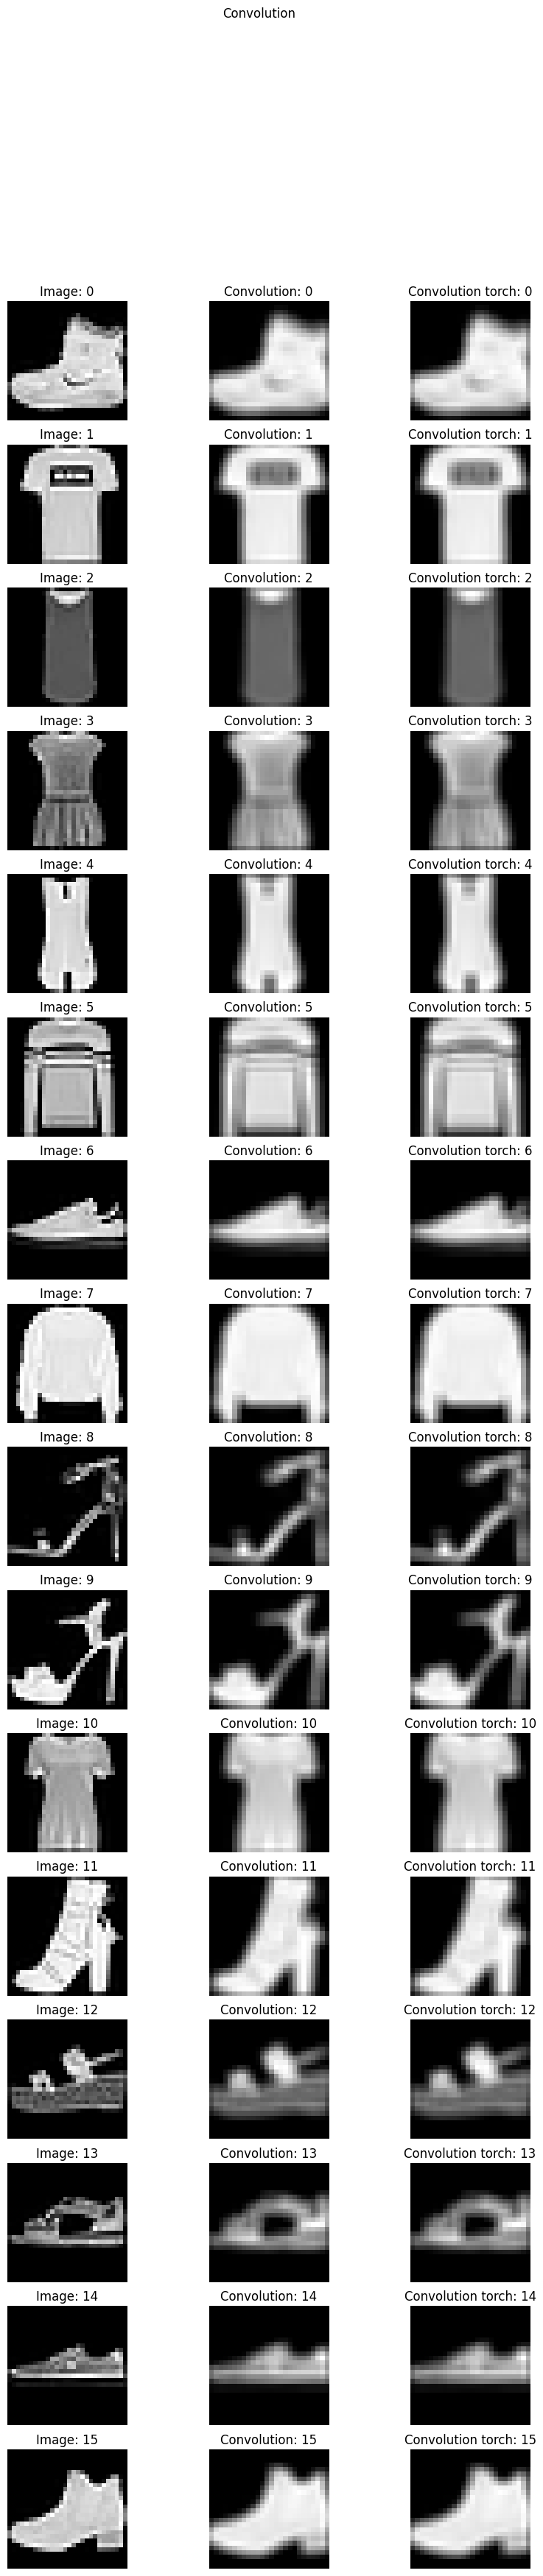

In [119]:
# Use the class constructors to do the necessary function orchestration and implement
# the actual operation of the input sample x in the forward method. For more details
# on the individual functions and their arguments consult the PyTorch documenta-
# tion: Conv2d, MaxPool2d, ReLU. The convolution and maximal pooling operations
# should provide no padding to the input. Here is a snippet of how each function
# should be applied to a batch of samples after you have completed its implementa-
# tion:
# x , y = t r a i n i n g _ d a t a s e t [ 0 ]
# f = ReLU ( )
# r e s u l t = f ( x )
# Use the dataset implementation from the previous exercises to test your model.
# Do not use the PyTorch implementations of these functions (torch.nn.Conv2d,
# torch.nn.MaxPool2d, torch.nn.ReLU) instead of implementing the functions your-
# selves!
# After you have completed each function’s implementation make sure that
# they perform the same as their PyTorch counterparts: torch.nn.Conv2d,
# torch.nn.MaxPool2d, and torch.nn.ReLU. Pass the same input through the corre-
# sponding functions and observe the pixel-wise absolute difference. The maximal
# difference should be smaller than 10−5. When comparing the convolution operations
# make sure that both functions contain the same weight and bias tensors (the weight
# and bias property of the convolution class).

batch_size = 16
train_dataset = Dataset(X_train_tensor, y_train_tensor, batch_size)
val_dataset = Dataset(X_val_tensor, y_val_tensor, batch_size)

# Test the Conv2d class
x, y = train_dataset[0]

conv = Conv2d(1, 1, (3,3), (1,1))
conv.weight = torch.nn.Parameter(torch.ones(1, 1, 3, 3))
conv.bias = torch.nn.Parameter(torch.zeros(1))
result_conv = conv(x)

conv_torch = torch.nn.Conv2d(1, 1, (3,3), (1,1))
conv_torch.weight = torch.nn.Parameter(torch.ones(1, 1, 3, 3))
conv_torch.bias = torch.nn.Parameter(torch.zeros(1))
result_conv_torch = conv_torch(x)

print('result_conv.shape: {}'.format(result_conv.shape))
print('result_conv_torch.shape: {}'.format(result_conv_torch.shape))

# Difference between the two convolutions
print('Max difference between the two convolutions: {}'.format(torch.max(torch.abs(result_conv - result_conv_torch))))

# Plot the results vs original image
fig, ax = plt.subplots(batch_size, 3, figsize=(10,40))
# fig.set_size_inches(15,40)
fig.suptitle("Convolution")

for i in range(3):
    for j in range(batch_size):
        if i == 0:
            ax[j, i].imshow(x[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"Image: {j}")
            ax[j, i].axis('off')
        elif i == 1:
            ax[j, i].imshow(result_conv[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"Convolution: {j}")
            ax[j, i].axis('off')
        else:
            ax[j, i].imshow(result_conv_torch[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"Convolution torch: {j}")
            ax[j, i].axis('off')



Max difference between the two max pools: 0.0


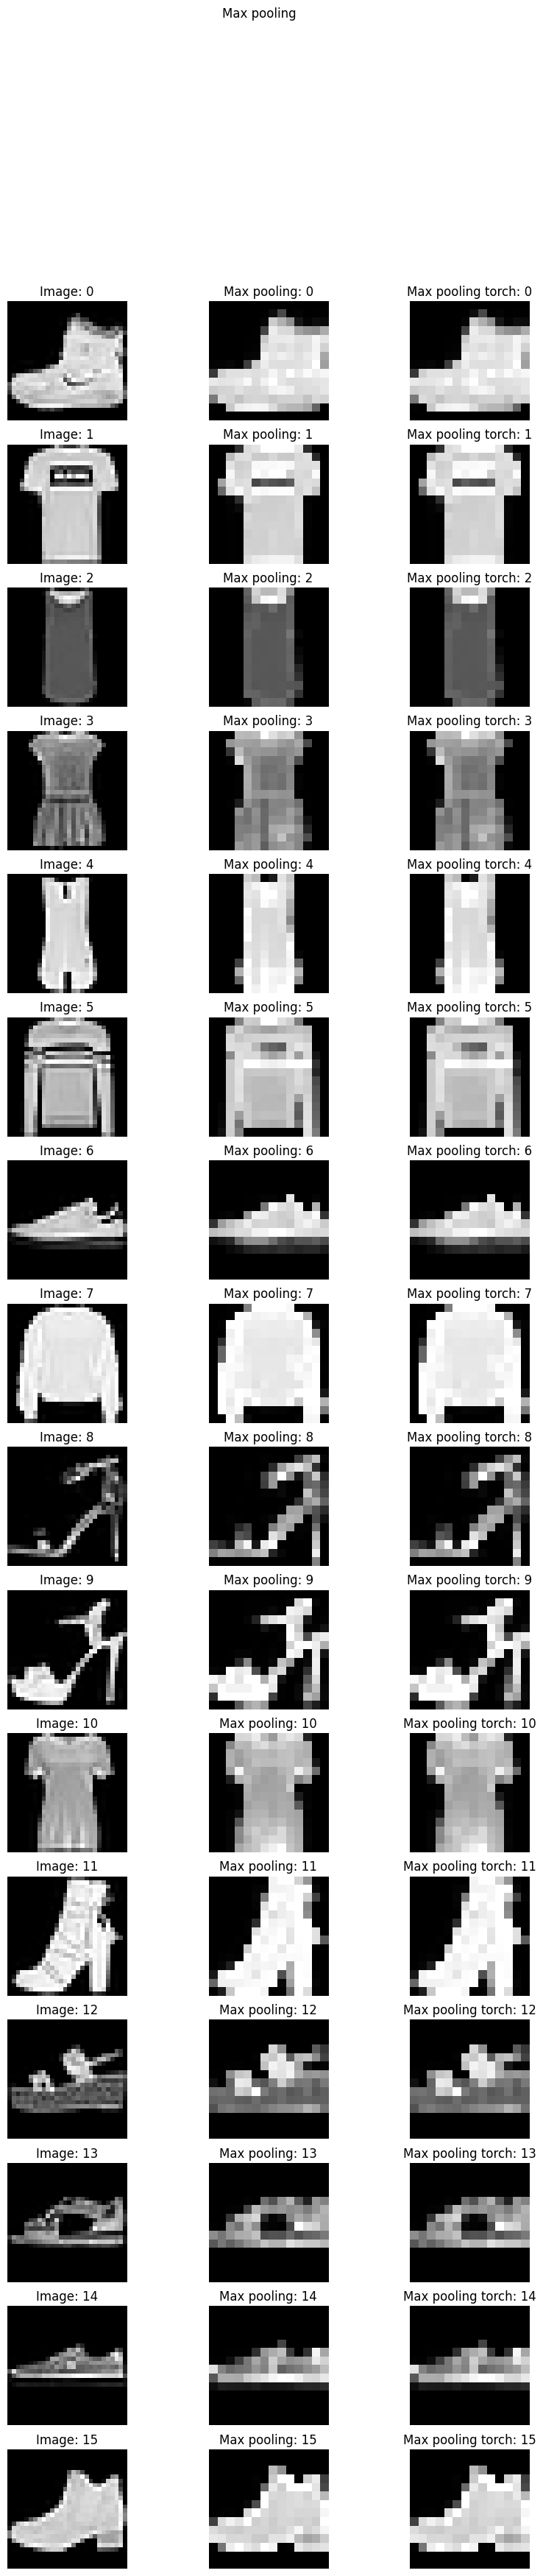

In [117]:
# Test the MaxPool2d class
x, y = train_dataset[0]

maxpool = MaxPool2d((2,2), (2,2))
result_maxpool = maxpool(x)

maxpool_torch = torch.nn.MaxPool2d((2,2), (2,2))
result_maxpool_torch = maxpool_torch(x)

# Difference between the two max pools
print('Max difference between the two max pools: {}'.format(torch.max(torch.abs(result_maxpool - result_maxpool_torch))))

# Plot the results vs original image
fig, ax = plt.subplots(batch_size, 3, figsize=(10,40))
# fig.set_size_inches(15,40)
fig.suptitle("Max pooling")

for i in range(3):
    for j in range(batch_size):
        if i == 0:
            ax[j, i].imshow(x[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"Image: {j}")
            ax[j, i].axis('off')
        elif i == 1:
            ax[j, i].imshow(result_maxpool[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"Max pooling: {j}")
            ax[j, i].axis('off')
        else:
            ax[j, i].imshow(result_maxpool_torch[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"Max pooling torch: {j}")
            ax[j, i].axis('off')
            

Max difference between the two ReLUs: 0.0


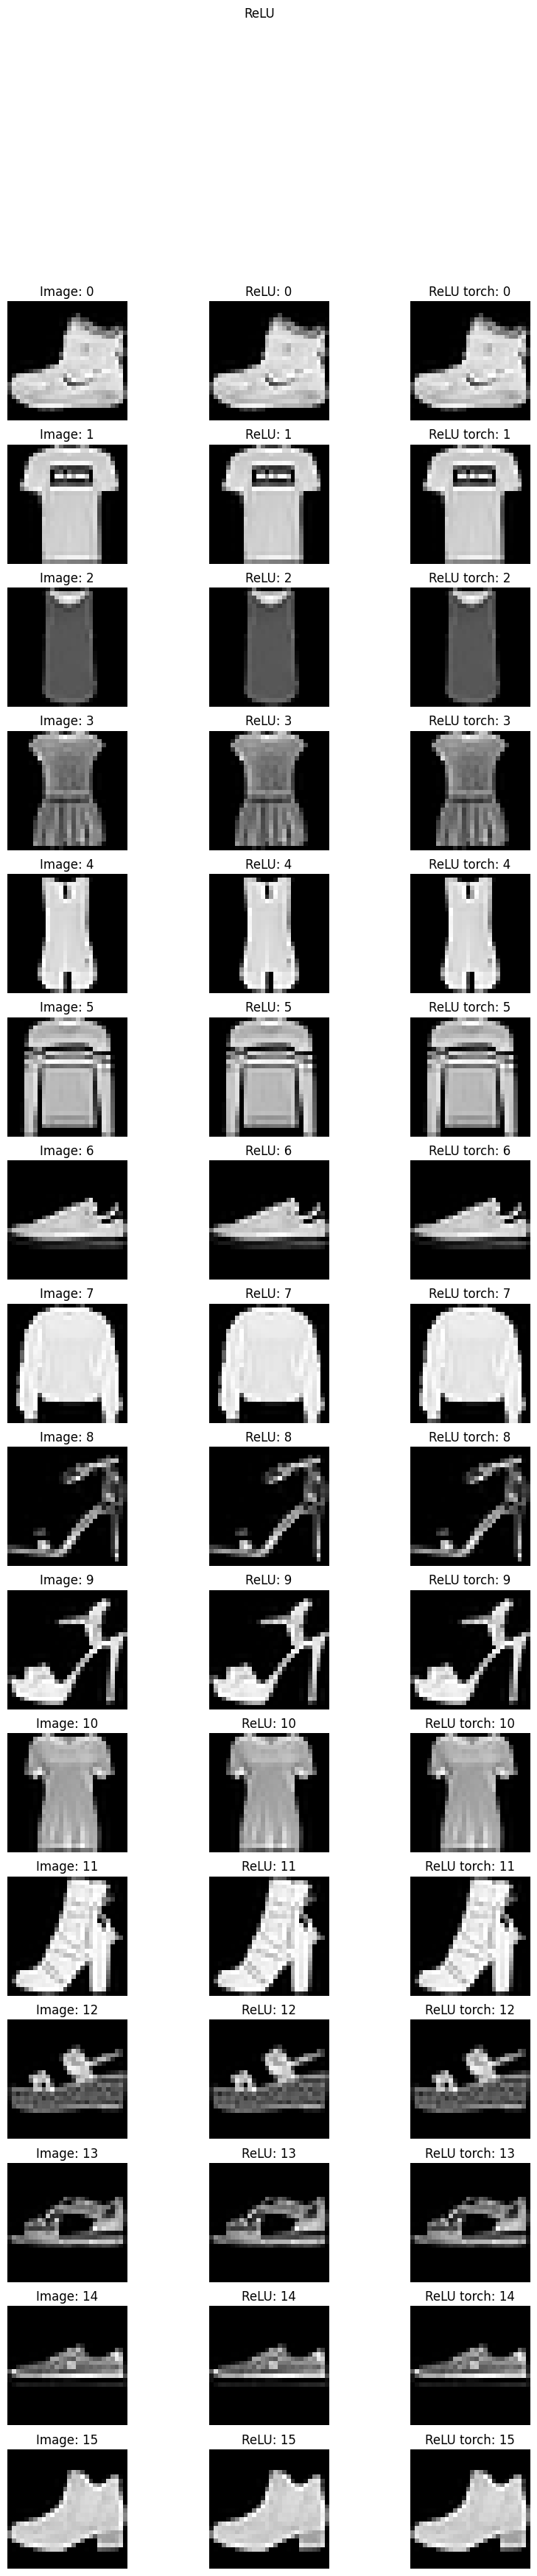

In [120]:
#  Test the ReLU class
x, y = train_dataset[0]

relu = ReLU()
result_relu = relu(x)

relu_torch = torch.nn.ReLU()
result_relu_torch = relu_torch(x)

# Difference between the two ReLUs
print('Max difference between the two ReLUs: {}'.format(torch.max(torch.abs(result_relu - result_relu_torch))))

# Plot the results vs original image
fig, ax = plt.subplots(batch_size, 3, figsize=(10,40))
fig.suptitle("ReLU")

for i in range(3):
    for j in range(batch_size):
        if i == 0:
            ax[j, i].imshow(x[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"Image: {j}")
            ax[j, i].axis('off')
        elif i == 1:
            ax[j, i].imshow(result_relu[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"ReLU: {j}")
            ax[j, i].axis('off')
        else:
            ax[j, i].imshow(result_relu_torch[j,0,:,:].detach().numpy(), cmap='gray')
            ax[j, i].set_title(f"ReLU torch: {j}")
            ax[j, i].axis('off')

x.shape: torch.Size([1, 1, 100, 100])
x.min: -0.9999736547470093
x.max: 0.9996635913848877
Max difference between the two functions: 0.0


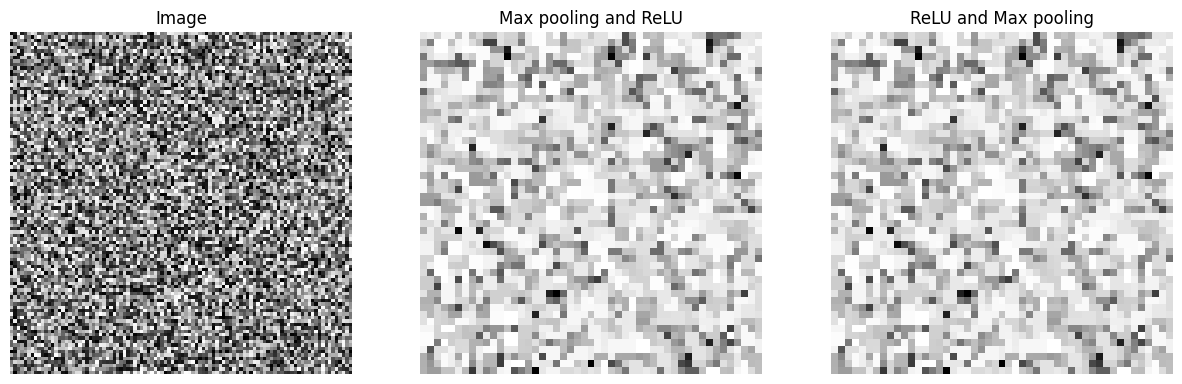

In [121]:
# We will briefly examine how the ordering of operations inside the neural network
# affects the output. We will look at the specific case of MaxPool2d and ReLU com-
# mutativity. Create a PyTorch tensor with random elements in the range [−1, 1] of
# dimensions [1, 100, 100]. Pass the tensor through two different transformations indi-
# vidually:
# • Function one: MaxPool2d(kernel_size = 3, stride = 2) followed by ReLU
# • Function two: ReLU followed by MaxPool2d(kernel_size = 3, stride = 2)
# Compare the outputs of the two sets. What did you observe? Explain the obtained
# results mathematically and think about the implications of this observation. Is the
# same true if we replace the maximal pooling operation with a convolution?

# Create the tensor
x = torch.rand(1, 1, 100, 100) * 2 - 1
print('x.shape: {}'.format(x.shape))
print('x.min: {}'.format(torch.min(x)))
print('x.max: {}'.format(torch.max(x)))

maxpool = MaxPool2d((3,3), (2,2))
relu = ReLU()

# Function one
result_one = relu(maxpool(x))

# Function two
result_two = maxpool(relu(x))

# Difference between the two functions
print('Max difference between the two functions: {}'.format(torch.max(torch.abs(result_one - result_two))))

# Plot the results vs original image
fig, ax = plt.subplots(1, 3, figsize=(15,5))

for i in range(3):
    if i == 0:
        ax[i].imshow(x[0,0,:,:].detach().numpy(), cmap='gray')
        ax[i].set_title(f"Image")
        ax[i].axis('off')
    elif i == 1:
        ax[i].imshow(result_one[0,0,:,:].detach().numpy(), cmap='gray')
        ax[i].set_title(f"Max pooling and ReLU")
        ax[i].axis('off')
    else:
        ax[i].imshow(result_two[0,0,:,:].detach().numpy(), cmap='gray')
        ax[i].set_title(f"ReLU and Max pooling")
        ax[i].axis('off')

In [122]:
# For this exercise, use the classes you constructed in the previous exercises.
# Now, we will define a neural network using the custom functions from previous ex-
# ercises. This network will produce a vector of 10 elements for each sample, predicting
# the class it belongs to. Our neural network will consist of the following basic blocks:
# • Conv2d followed by MaxPool2d followed by ReLU
# There should be two such blocks in your network, one following the other. The ker-
# nel size of both the convolution and maximal pooling layers in both blocks should
# be equal to 3. The output of the second block should be a tensor with the following
# dimensions: [B, 64, 4, 4], where B is the batch size and 64 is the number of channels.
# You have to determine the appropriate remaining hyperparameters for the blocks to
# produce an output of such shape.
# Finally, your model should end with a single convolution layer with a kernel_size
# of 4 which will produce 10 output channels. The output of this layer should there-
# fore be a tensor with a dimension equal to [B, 10, 1, 1]. Apply a flatten operation
# (torch.nn.Flatten) on the last layer’s output to generate the output of size: [B, 10].
# Create the same neural network architecture, but use the built-in PyTorch classes:
# torch.nn.Conv2d, torch.nn.MaxPool2d, torch.nn.ReLU.



# Define the model
model = torch.nn.Sequential(
    Conv2d(1, 32, (3,3), (1,1)),
    MaxPool2d((3,3), (2,2)),
    ReLU(),
    Conv2d(32, 64, (3,3), (1,1)),
    MaxPool2d((3,3), (2,2)),
    ReLU(),
    Conv2d(64, 10, (4,4), (1,1)),
    torch.nn.Flatten()
)

# Define the model using the built-in PyTorch classes
model_torch = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, (3,3), (1,1)),
    torch.nn.MaxPool2d((3,3), (2,2)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(32, 64, (3,3), (1,1)),
    torch.nn.MaxPool2d((3,3), (2,2)),
    torch.nn.ReLU(),
    torch.nn.Conv2d(64, 10, (4,4), (1,1)),
    torch.nn.Flatten()
)



In [153]:
# For this exercise, use the models you constructed in the previous exercises.
# Lets put it all together! Using the Stochastic Gradient Descent algorithm and the
# Cross-Entropy loss function define a function fit, which takes in two parameters: the
# model you wish to fit and the number of epochs, denoting the number of times you
# will iterate over the training and validation datasets.
# def f i t ( model , number_of_epochs ) :
#   TODO: P r o v i d e i m p l e m e n t a t i o n
#   r e t u r n best_model , t r a i n i n g _ l o s s e s , v a l i d a t i o n _ l o s s e s


def fit(model, number_of_epochs, train_dataset, val_dataset, verbose=1):
    # Define the loss function and the optimizer
    loss_function = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

    # Initialize the training and validation losses
    training_losses = []
    validation_losses = []

    # Initialize the best model and the best validation loss
    best_model = None
    best_val_loss = np.inf

    # Iterate over the epochs
    for epoch in range(number_of_epochs):

        # Initialize the epoch training loss
        epoch_training_loss = 0.0

        # Iterate over the training set
        for i, (x, y) in enumerate(train_dataset):
            if i == len(train_dataset):
                break

            # Zero the gradients
            optimizer.zero_grad()

            # Perform the forward pass
            y_hat = model(x)
            
            # Calculate the loss
            loss = loss_function(y_hat, torch.argmax(y, dim=1))

            # Perform the backward pass
            loss.backward()

            # Perform the gradient descent step
            optimizer.step()

            # Add the batch loss to the epoch loss
            epoch_training_loss += loss.item()

            if verbose == 1:
                print('Epoch [{}/{}], Data: {} - {}, Avg Training loss: {:.4f}\n'.format(epoch + 1, number_of_epochs, i*x.shape[0], (i+1)*x.shape[0], epoch_training_loss/(i+1)), end='\r')

        # Calculate the average epoch training loss
        epoch_training_loss /= len(train_dataset)

        # Initialize the epoch validation loss
        epoch_validation_loss = 0.0

        # Iterate over the validation set
        for i, (x, y) in enumerate(val_dataset):
            if i == len(val_dataset):
                break

            # Perform the forward pass
            y_hat = model(x)

            # Calculate the loss
            loss = loss_function(y_hat, torch.argmax(y, dim=1))
            
            # Add the batch loss to the epoch loss
            epoch_validation_loss += loss.item()

            if verbose == 1:
                print('Epoch [{}/{}], Data: {} - {}, Avg Validation loss: {:.4f}\n'.format(epoch + 1, number_of_epochs, i*x.shape[0], (i+1)*x.shape[0], epoch_validation_loss/(i+1)), end='\r')

        # Calculate the average epoch validation loss
        epoch_validation_loss /= len(val_dataset)

        # Store the losses
        training_losses.append(epoch_training_loss)
        validation_losses.append(epoch_validation_loss)

        # Print the metrics for every  epoch
        print('Epoch [{}/{}], Training loss: {:.4f}, Validation loss: {:.4f}\n'.format(
            epoch + 1, number_of_epochs, epoch_training_loss, epoch_validation_loss))

        # Check if the current model has the best validation loss so far
        if epoch_validation_loss < best_val_loss:
            best_val_loss = epoch_validation_loss
            best_model = model

    return best_model, training_losses, validation_losses

In [154]:
def predict(model, dataset, batch_size):
    # Initialize the predictions and the labels
    predictions = np.zeros(len(dataset) * batch_size)
    labels = np.zeros(len(dataset) * batch_size)

    # Iterate over the dataset
    for i, (x, y) in enumerate(dataset):
        if i == len(dataset):
            break

        # Perform the forward pass
        y_hat = model(x)

        # Get the predicted labels
        predictions[i*batch_size:(i+1)*batch_size] = torch.argmax(y_hat, dim=1).detach().numpy()

        # Get the true labels
        labels[i*batch_size:(i+1)*batch_size] = torch.argmax(y, dim=1).detach().numpy()

    return predictions, labels

Epoch [1/10], Data: 0 - 100, Avg Training loss: 2.3022
Epoch [1/10], Data: 100 - 200, Avg Training loss: 2.3037
Epoch [1/10], Data: 200 - 300, Avg Training loss: 2.3031
Epoch [1/10], Data: 300 - 400, Avg Training loss: 2.3030
Epoch [1/10], Data: 400 - 500, Avg Training loss: 2.3031
Epoch [1/10], Data: 500 - 600, Avg Training loss: 2.3030
Epoch [1/10], Data: 600 - 700, Avg Training loss: 2.3027
Epoch [1/10], Data: 700 - 800, Avg Training loss: 2.3029
Epoch [1/10], Data: 800 - 900, Avg Training loss: 2.3031
Epoch [1/10], Data: 900 - 1000, Avg Training loss: 2.3028
Epoch [1/10], Data: 1000 - 1100, Avg Training loss: 2.3028
Epoch [1/10], Data: 1100 - 1200, Avg Training loss: 2.3028
Epoch [1/10], Data: 1200 - 1300, Avg Training loss: 2.3026
Epoch [1/10], Data: 1300 - 1400, Avg Training loss: 2.3027
Epoch [1/10], Data: 1400 - 1500, Avg Training loss: 2.3025
Epoch [1/10], Data: 1500 - 1600, Avg Training loss: 2.3026
Epoch [1/10], Data: 1600 - 1700, Avg Training loss: 2.3027
Epoch [1/10], Data

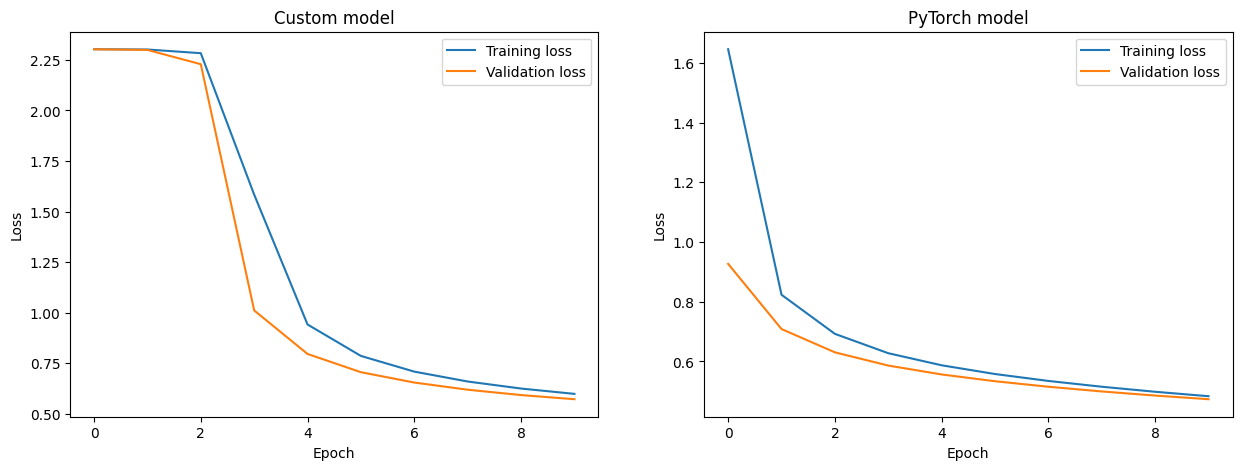

In [124]:
# Train both models from the previous exercise (your custom model and the PyTorch
# equivalent) for 10 epochs. The fit function should return the model that best per-
# formed on the validation dataset during training and a list of 10 training and valida-
# tion losses, one for each epoch.
# Visualize the training and validation losses for all 10 epochs and both models. Is
# there a difference in performance? Account for the various potential sources of these
# differences.
# Use the torch.optim.SGD and torch.nn.CrossEntropyLoss classes for the
# Stochastic Gradient Descent and the Cross-Entropy loss function.

batch_size = 100
train_dataset = Dataset(X_train_tensor, y_train_tensor, batch_size)
val_dataset = Dataset(X_val_tensor, y_val_tensor, batch_size)
test_dataset = Dataset(X_test_tensor, y_test_tensor, batch_size)

# Train the custom model
best_model, training_losses, validation_losses = fit(model, 10, train_dataset, val_dataset, verbose=1)

# Train the PyTorch model
best_model_torch, training_losses_torch, validation_losses_torch = fit(model_torch, 10, train_dataset, val_dataset, verbose=1)

# Plot the training and validation losses
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(training_losses, label='Training loss')
plt.plot(validation_losses, label='Validation loss')
plt.title('Custom model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(training_losses_torch, label='Training loss')
plt.plot(validation_losses_torch, label='Validation loss')
plt.title('PyTorch model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Testing model: 
Sequential(
  (0): Conv2d()
  (1): MaxPool2d()
  (2): ReLU()
  (3): Conv2d()
  (4): MaxPool2d()
  (5): ReLU()
  (6): Conv2d()
  (7): Flatten(start_dim=1, end_dim=-1)
)
              precision    recall  f1-score   support

         0.0     0.7358    0.7880    0.7610      1000
         1.0     0.9604    0.9220    0.9408      1000
         2.0     0.6385    0.6430    0.6408      1000
         3.0     0.7829    0.8080    0.7953      1000
         4.0     0.5944    0.7650    0.6690      1000
         5.0     0.9022    0.8950    0.8986      1000
         6.0     0.4869    0.2970    0.3689      1000
         7.0     0.8833    0.9010    0.8921      1000
         8.0     0.9126    0.9190    0.9158      1000
         9.0     0.9162    0.9290    0.9225      1000

    accuracy                         0.7867     10000
   macro avg     0.7813    0.7867    0.7805     10000
weighted avg     0.7813    0.7867    0.7805     10000

Testing model: 
Sequential(
  (0): Conv2d(1, 32, kernel_s

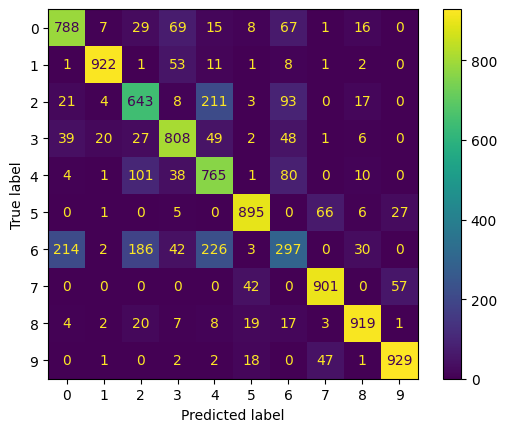

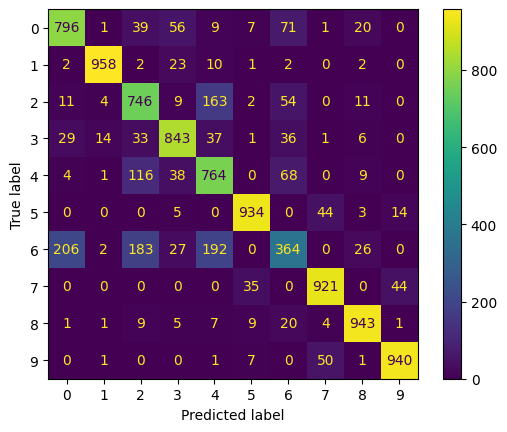

In [145]:
# Test the best model on the test set. Report the accuracy of the model on the test
# set. Use the torch.argmax function to convert the output of the model to class
# labels. Use the sklearn.metrics.accuracy_score function to calculate the accuracy
# of the model. Use the sklearn.metrics.confusion_matrix function to calculate the
# confusion matrix of the model. Visualize the confusion matrix using the
# sklearn.metrics.plot_confusion_matrix function. What do you observe? Which
# classes are the easiest to predict? Which classes are the hardest to predict? Why do
# you think that is the case? What could you do to improve the performance of your
# model?


for model in (best_model, best_model_torch):
    print('Testing model: \n{}'.format(model))
    
    # Get the predictions and the labels
    y_pred, y_true = predict(model, test_dataset, batch_size)

    # Print the classification report
    print(classification_report(y_true, y_pred, digits=4))

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(sk_confusion_matrix(y_true, y_pred))
    disp.plot()

In [166]:
# For this exercise, use the fit function and dataset class you constructed in the previous
# exercises.
# Create a custom neural network model using PyTorch functions and fit the model to
# the training data. Optimize the neural network hyperparameters (number of layers,
# kernel size, etc...) to get the best results on the validation dataset.
# Evaluate your prediction on the validation dataset using the performance.plot_stats
# function (included in the assignment materials) which takes as input your model’s
# predictions and the corresponding correct labels (both in one-hot encoding format
# and numpy ndarrays). The output of the function is the image titled stats.png, con-
# taining the class confusion matrix, and the macro recall and macro precision values
# for each class.
# Explain the results you observe. What is the most challenging class to classify? Why?


def grid_search(models, param_grid, verbose=0):
    # Initialize the best model and the best validation loss
    bestest_model = None
    best_params = None
    best_f1 = 0

    # Split the data 
    split = 0.8
    train_size = int(split * len(X_train_tensor))
    val_size = len(X_train_tensor) - train_size

    X_train_tensor_1, X_val_tensor_1 = torch.utils.data.random_split(X_train_tensor, [train_size, val_size])
    y_train_tensor_1, y_val_tensor_1 = torch.utils.data.random_split(y_train_tensor, [train_size, val_size])
    # Iterate over the parameters
    for model in models:
        for batch_size in param_grid['batch_size']:

            train_dataset = Dataset(X_train_tensor_1, y_train_tensor_1, batch_size)
            val_dataset = Dataset(X_val_tensor_1, y_val_tensor_1, batch_size)
            test_dataset = Dataset(X_val_tensor, y_val_tensor, batch_size)

            for epochs in param_grid['epochs']:
                for learning_rate in param_grid['learning_rate']:
                    
                    # Train the model
                    best_model, _, _ = fit(model, epochs, train_dataset, val_dataset, verbose=0)

                    # Get the predictions and the labels
                    y_pred, y_true = predict(best_model, test_dataset, batch_size)

                    # Calculate the f1 score
                    f1 = f1_score(y_true, y_pred, average='macro')

                    if verbose == 1:
                        print('batch_size: {}, epochs: {}, learning_rate: {}, f1: {}'.format(batch_size, epochs, learning_rate, f1))

                    # Check if the current model has the best validation loss so far
                    if f1 > best_f1:
                        best_f1 = f1
                        bestest_model = best_model
                        best_params = {'batch_size': batch_size, 'epochs': epochs, 'learning_rate': learning_rate}
        
    return bestest_model, best_params

# Do a GridSearch to find the best hyperparameters

# Define the model using the built-in PyTorch classes
models = [
    torch.nn.Sequential(
        torch.nn.Conv2d(1, 32, (3,3), (1,1)),
        torch.nn.MaxPool2d((3,3), (2,2)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(32, 64, (3,3), (1,1)),
        torch.nn.MaxPool2d((3,3), (2,2)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 10, (4,4), (1,1)),
        torch.nn.Flatten()
    ),
    torch.nn.Sequential(
        torch.nn.Conv2d(1, 32, (3,3), (1,1)),
        torch.nn.MaxPool2d((3,3), (2,2)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(32, 64, (3,3), (1,1)),
        torch.nn.MaxPool2d((3,3), (2,2)),
        torch.nn.ReLU(),
        torch.nn.Conv2d(64, 10, (4,4), (1,1)),
        torch.nn.Flatten()
    )
]

# Define the grid search parameters
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [5, 10, 15],
    'learning_rate': [0.001, 0.01, 0.1],
}

best_model, best_params = grid_search(model, param_grid, verbose=1)

print('Best model: \n{}'.format(best_model))

# Get the predictions and the labels
y_pred, y_true = predict(best_model, test_dataset, best_params['batch_size'])

# Print the classification report
print(classification_report(y_true, y_pred, digits=4))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(sk_confusion_matrix(y_true, y_pred))
disp.plot()




Epoch [1/5], Data: 0 - 32, Avg Training loss: 2.3078
Epoch [1/5], Data: 32 - 64, Avg Training loss: 2.3108
Epoch [1/5], Data: 64 - 96, Avg Training loss: 2.3048
Epoch [1/5], Data: 96 - 128, Avg Training loss: 2.3082
Epoch [1/5], Data: 128 - 160, Avg Training loss: 2.3062
Epoch [1/5], Data: 160 - 192, Avg Training loss: 2.3075
Epoch [1/5], Data: 192 - 224, Avg Training loss: 2.3076
Epoch [1/5], Data: 224 - 256, Avg Training loss: 2.3038
Epoch [1/5], Data: 256 - 288, Avg Training loss: 2.3052
Epoch [1/5], Data: 288 - 320, Avg Training loss: 2.3047
Epoch [1/5], Data: 320 - 352, Avg Training loss: 2.3047
Epoch [1/5], Data: 352 - 384, Avg Training loss: 2.3058
Epoch [1/5], Data: 384 - 416, Avg Training loss: 2.3058
Epoch [1/5], Data: 416 - 448, Avg Training loss: 2.3061
Epoch [1/5], Data: 448 - 480, Avg Training loss: 2.3044
Epoch [1/5], Data: 480 - 512, Avg Training loss: 2.3051
Epoch [1/5], Data: 512 - 544, Avg Training loss: 2.3055
Epoch [1/5], Data: 544 - 576, Avg Training loss: 2.3046
